#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

---
---
##<center> Ομάδα: 35 </center>
#####<center>Βαρδάκης Χριστόφορος: el18883</center>
#####<center>Σκουρτσή Δήμητρα Άννα: el18044</center>
---
---

# 1. Θεωρητικό Μέρος

1. Μια συχνή **συνάρτηση ενεργοποίησης** είναι η **Rectified Linear Unit (ReLU)**, η οποίο δίνεται από τη συνάρτηση:
$$
f \left( z \right) = max \left( 0, z \right)
$$
<center>
<img src="https://miro.medium.com/max/1026/0*g9ypL5M3k-f7EW85.png" width=70%>
</center>
Είναι μια γραμμική συνάρτηση η οποία προτιμάται λόγω του μικρότερου υπολογιστικού της φόρτου, της αποφυγής του προβλήματος Vanishing Gradient, επιτρέποντας στο μοντέλο να συγκλίνει πιο γρήγορα και να έχει καλύτερη επίδοση. Γενικά θεωρείται ως η βασική συνάρτηση ενεργοποίησης για MLP και CNN. <br><br>

2. Στον παρκάτω πίνακα συνοψίζονται οι διαφορές των τριών δικτύων.
<table>
  <tr>
    <th> </th>
    <th>LeNet</th>
    <th>AlexNet</th>
    <th>VGG</th>
  </tr>
  <tr>
    <td><b>Επίπεδα</b></td>
    <td><center>7</td>
    <td><center>8</td>
    <td><center>16</td>
  </tr>
  <tr>
    <td><b>Μέγεθος Φίλτρων</td>
    <td><center>5x5x3 <br>kernel-sized filters</td>
    <td><center>11x11x3, 5x5x3, 3x3x3 <br>kernel-sized filters</td>
    <td><center>3x3x3 <br>kernel-sized filters</td>
  </tr>
  <tr>
    <td><b>Συνάρτηση Ενεργοποίησης</td>
    <td><center>sigmoid</td>
    <td><center>ReLU</td>
    <td><center>ReLU</td>
  </tr>
  <tr>
    <td><b>Πλήθος παραμέτρων</td>
    <td><center>3,246</td>
    <td><center>62 million</td>
    <td><center>138 million</td>
  </tr>
  <tr>
    <td><b>Τεχνικές pooling</td>
    <td><center>2x2 average pooling<br> with stride of 2</td>
    <td><center>3x3 maximum pooling<br> with stride 2</td>
    <td><center>2x2 maximum pooling<br> with stride of 2</td>
  </tr>
  <tr>
    <td><b>Τεχνικές dropout</td>
    <td><center>No</td>
    <td><center>Yes dropout=0.5</td>
    <td><center>Yes dropout=0.5</td>
  </tr>
</table> <br> 
Σχολιασμός των διαφορών:
- **LeNet:** Λόγω του ότι προορίζεται για ταξινόμηση σε 10 κλάσεις έχει την απλούστερη αρχιτεκτονική με τα λιγότερα επίπεδα και τις λιγότερες εκπαιδεύσιμες παραμέτρους. Επιπλεόν, κάνει χρήση της sigmoid έναντι της ReLU που χρησιμοποιούν τα άλλα δυο μοντέλα, και χρησιμοποίει average pooling ενώ τα άλλα δύο maximum pooling.
- **AlexNet:** Είναι το μόνο που χρησιμοποιεί τρια διαφορετικά μεγέθη φίλτρων, γεγονός που οφείλεται στο μέγεθος της αρχικής εικόνας (224x224 px), ενώ αξιοποιεί την ReLU και τεχνικές dropout με βαθμό 0.5.
- **Vgg:** Έχει τα περισσότερα επίπεδα και το μεγαλύτερο πλήθος εκπαιδεύσιμων παραμέτρων, γεγονώς που το καθιστά το πιο χρονοβόρο στην εκπαίδευση.
Στην σταδική αύξηση της ακρίβειας ταξινόμησης συνέβαλαν τα εξής χαρακτηριστικά. Αρχικά η χρήση συναρτήσεων ενεργοποίησης, κάνοντας την εκαπίδευση μη-γραμμική. Επίσης, η χρήση πολλαπλών επιπέδψν διευκολύνει την εκπαίδευση καθώς από μια εικόνα εξάγωνται τα features της τα οποία βοηθούν στην ταξινόμησή της. Τέλος, η χρήση τεχνικών pooling Και dropout βοηθούν στην ανιμετώπιση προβλημάτων όπως το overfitting και το vanishing gradient.

# 2. Υλοποίηση αλγορίθμου
## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 12

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' aquarium_fish', ' beaver', ' beetle', ' bicycle', ' butterfly', ' can', ' cloud', ' cockroach', ' flatfish', ' lizard', ' mountain', ' orange', ' orchid', ' otter', ' pear', ' poppy', ' squirrel', ' streetcar', ' wardrobe', ' woman']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


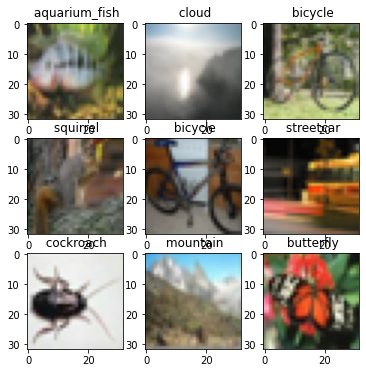

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
dictionary = {}
train_labels = y_train
i=0
for num_label in  y_train.reshape(-1):
  if num_label not in dictionary.keys():
    dictionary[num_label] = i
    i+=1
    if(i>20): print(i,"Error")

y_train = np.array([[dictionary[label]] for label in y_train.reshape(-1)])  
y_test = np.array([[dictionary[label]] for label in y_test.reshape(-1)])
y_val = np.array([[dictionary[label]] for label in y_val.reshape(-1)])

## Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα (όπως στο Lab8.1).
---
  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.


## ΣΗΜΕΙΩΣΗ
Για την εκπαίδευση των μοντέλων χρησιμοποιήσαμε 30 εποχές, καθώς μέσω δοκιμών παρατηρίσαμε ότι ήδη από τις 20 εποχές όλα τα μοντέλα φτάνουν πολύ κοντά στη βέλτιστη ακρίβεια που μπορούν να πετύχουν.

In [ ]:
def train(model, epochs, batch_size, callbacks = None):
  return model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks = callbacks, validation_data=(x_val, y_val))

In [ ]:
def plot(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.0, 1])
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
def LeNet_builder(optimizer, epochs, batch_size):
  model = models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(28, 28, interpolation="bilinear", input_shape=x_train.shape[1:]))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.AveragePooling2D(pool_size=2, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
  model.add(layers.BatchNormalization())
  model.add(layers.AveragePooling2D(pool_size=2, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(120, activation='sigmoid'))
  model.add(layers.Dense(84, activation='sigmoid'))
  model.add(layers.Dense(20))
  model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  history= train(model, epochs, batch_size)
  return model , history

************************LeNet*******************************
Test 1 : optimizer = Adam, epochs = 30, batch size = 32
Epoch 1/30
266/266 [==============================] - 2s 6ms/step - loss: 2.5964 - accuracy: 0.2275 - val_loss: 2.5594 - val_accuracy: 0.2533
Epoch 2/30
266/266 [==============================] - 1s 5ms/step - loss: 2.2959 - accuracy: 0.2996 - val_loss: 2.2510 - val_accuracy: 0.3100
Epoch 3/30
266/266 [==============================] - 1s 5ms/step - loss: 2.1307 - accuracy: 0.3476 - val_loss: 2.1050 - val_accuracy: 0.3667
Epoch 4/30
266/266 [==============================] - 2s 7ms/step - loss: 1.9979 - accuracy: 0.3958 - val_loss: 1.9914 - val_accuracy: 0.3953
Epoch 5/30
266/266 [==============================] - 1s 5ms/step - loss: 1.9007 - accuracy: 0.4175 - val_loss: 1.8695 - val_accuracy: 0.4347
Epoch 6/30
266/266 [==============================] - 1s 5ms/step - loss: 1.8113 - accuracy: 0.4494 - val_loss: 1.8192 - val_accuracy: 0.4473
Epoch 7/30
266/266 [===========

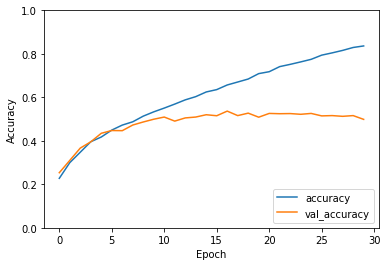

************************LeNet*******************************
Test 2 : optimizer = SGD, epochs = 30, batch size = 32
Epoch 1/30
266/266 [==============================] - 2s 5ms/step - loss: 2.9871 - accuracy: 0.0952 - val_loss: 2.9731 - val_accuracy: 0.0940
Epoch 2/30
266/266 [==============================] - 1s 4ms/step - loss: 2.9008 - accuracy: 0.1591 - val_loss: 2.8831 - val_accuracy: 0.1487
Epoch 3/30
266/266 [==============================] - 1s 5ms/step - loss: 2.8513 - accuracy: 0.1826 - val_loss: 2.8206 - val_accuracy: 0.1947
Epoch 4/30
266/266 [==============================] - 1s 4ms/step - loss: 2.7978 - accuracy: 0.1929 - val_loss: 2.7646 - val_accuracy: 0.2047
Epoch 5/30
266/266 [==============================] - 1s 4ms/step - loss: 2.7465 - accuracy: 0.2075 - val_loss: 2.7103 - val_accuracy: 0.2180
Epoch 6/30
266/266 [==============================] - 1s 4ms/step - loss: 2.6959 - accuracy: 0.2152 - val_loss: 2.6583 - val_accuracy: 0.2253
Epoch 7/30
266/266 [============

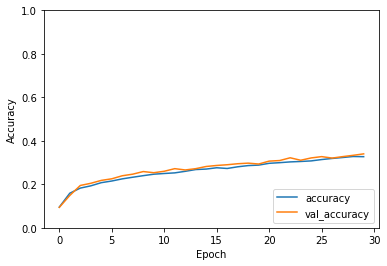

************************LeNet*******************************
Test 3 : optimizer = Adam, epochs = 30, batch size = 128
Epoch 1/20
67/67 [==============================] - 1s 10ms/step - loss: 2.7397 - accuracy: 0.1828 - val_loss: 3.0810 - val_accuracy: 0.0647
Epoch 2/20
67/67 [==============================] - 0s 7ms/step - loss: 2.4537 - accuracy: 0.2664 - val_loss: 3.0182 - val_accuracy: 0.1253
Epoch 3/20
67/67 [==============================] - 0s 6ms/step - loss: 2.3041 - accuracy: 0.3102 - val_loss: 2.8337 - val_accuracy: 0.0780
Epoch 4/20
67/67 [==============================] - 0s 6ms/step - loss: 2.1983 - accuracy: 0.3398 - val_loss: 2.8030 - val_accuracy: 0.1287
Epoch 5/20
67/67 [==============================] - 0s 6ms/step - loss: 2.1114 - accuracy: 0.3698 - val_loss: 2.7175 - val_accuracy: 0.1707
Epoch 6/20
67/67 [==============================] - 0s 6ms/step - loss: 2.0290 - accuracy: 0.3871 - val_loss: 2.5565 - val_accuracy: 0.2073
Epoch 7/20
67/67 [=======================

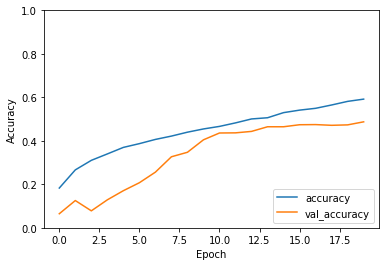

************************LeNet*******************************
Test 4 : optimizer = SGD, epochs = 30, batch size = 128
Epoch 1/30
67/67 [==============================] - 1s 9ms/step - loss: 3.0476 - accuracy: 0.0571 - val_loss: 3.0065 - val_accuracy: 0.0400
Epoch 2/30
67/67 [==============================] - 0s 6ms/step - loss: 2.9819 - accuracy: 0.0691 - val_loss: 2.9947 - val_accuracy: 0.0453
Epoch 3/30
67/67 [==============================] - 0s 6ms/step - loss: 2.9602 - accuracy: 0.1136 - val_loss: 2.9900 - val_accuracy: 0.0493
Epoch 4/30
67/67 [==============================] - 0s 6ms/step - loss: 2.9461 - accuracy: 0.1331 - val_loss: 2.9786 - val_accuracy: 0.1220
Epoch 5/30
67/67 [==============================] - 0s 6ms/step - loss: 2.9334 - accuracy: 0.1433 - val_loss: 2.9610 - val_accuracy: 0.1440
Epoch 6/30
67/67 [==============================] - 0s 6ms/step - loss: 2.9209 - accuracy: 0.1576 - val_loss: 2.9394 - val_accuracy: 0.1467
Epoch 7/30
67/67 [=========================

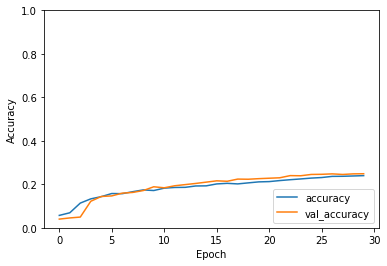

In [ ]:
print("************************LeNet*******************************")
print ("Test 1 : optimizer = Adam, epochs = 30, batch size = 32" )
LeNet_1, history_LN_1 = LeNet_builder('adam',30,32)
plot(history_LN_1)
print("************************LeNet*******************************")
print ("Test 2 : optimizer = SGD, epochs = 30, batch size = 32" )
LeNet_2, history_LN_2 = LeNet_builder('sgd', 30, 32)
plot(history_LN_2)
print("************************LeNet*******************************")
print ("Test 3 : optimizer = Adam, epochs = 30, batch size = 128" )
LeNet_3, history_LN_3 = LeNet_builder('adam', 20, 128)
plot(history_LN_3)
print("************************LeNet*******************************")
print ("Test 4 : optimizer = SGD, epochs = 30, batch size = 128" )
LeNet_4, history_LN_4 = LeNet_builder('sgd', 30, 128)
plot(history_LN_4)

In [ ]:
def AlexNet_builder(optimizer, epochs, batch_size):
  model = models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
  model.add(layers.Conv2D(filters=96, kernel_size=11, strides=4, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=3, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=3, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=3, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20))
  model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  history= train(model, epochs, batch_size)
  
  return model, history

************************AlexNet*******************************
Test 1 : optimizer = Adam, epochs = 30, batch size = 32
Epoch 1/30
266/266 [==============================] - 14s 48ms/step - loss: 3.9740 - accuracy: 0.1733 - val_loss: 3.1022 - val_accuracy: 0.1993
Epoch 2/30
266/266 [==============================] - 13s 47ms/step - loss: 2.6851 - accuracy: 0.2398 - val_loss: 2.7386 - val_accuracy: 0.2380
Epoch 3/30
266/266 [==============================] - 13s 47ms/step - loss: 2.5385 - accuracy: 0.2651 - val_loss: 2.1373 - val_accuracy: 0.3507
Epoch 4/30
266/266 [==============================] - 13s 48ms/step - loss: 2.4349 - accuracy: 0.2926 - val_loss: 2.2962 - val_accuracy: 0.3120
Epoch 5/30
266/266 [==============================] - 13s 48ms/step - loss: 2.3307 - accuracy: 0.3113 - val_loss: 2.3308 - val_accuracy: 0.2987
Epoch 6/30
266/266 [==============================] - 13s 48ms/step - loss: 2.2368 - accuracy: 0.3505 - val_loss: 2.1295 - val_accuracy: 0.3547
Epoch 7/30
266/26

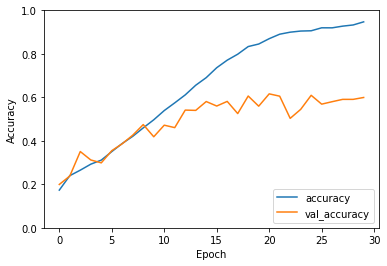

************************AlexNet*******************************
Test 2 : optimizer = SGD, epochs = 30, batch size = 32
Epoch 1/30
266/266 [==============================] - 12s 44ms/step - loss: 2.8569 - accuracy: 0.2327 - val_loss: 2.1237 - val_accuracy: 0.3427
Epoch 2/30
266/266 [==============================] - 11s 43ms/step - loss: 2.0949 - accuracy: 0.3752 - val_loss: 1.9150 - val_accuracy: 0.3847
Epoch 3/30
266/266 [==============================] - 11s 43ms/step - loss: 1.7582 - accuracy: 0.4611 - val_loss: 1.8934 - val_accuracy: 0.4047
Epoch 4/30
266/266 [==============================] - 11s 43ms/step - loss: 1.5510 - accuracy: 0.5159 - val_loss: 2.2489 - val_accuracy: 0.3507
Epoch 5/30
266/266 [==============================] - 11s 43ms/step - loss: 1.3971 - accuracy: 0.5545 - val_loss: 1.4682 - val_accuracy: 0.5567
Epoch 6/30
266/266 [==============================] - 11s 43ms/step - loss: 1.2583 - accuracy: 0.6000 - val_loss: 1.3873 - val_accuracy: 0.5680
Epoch 7/30
266/266

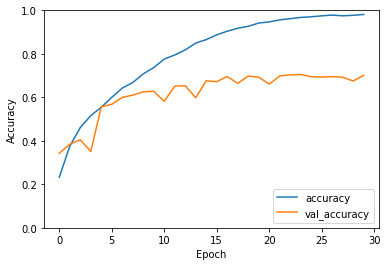

************************AlexNet*******************************
Test 3 : optimizer = Adam, epochs = 30, batch size = 128
Epoch 1/30
67/67 [==============================] - 11s 152ms/step - loss: 3.8347 - accuracy: 0.2111 - val_loss: 6.2017 - val_accuracy: 0.1040
Epoch 2/30
67/67 [==============================] - 10s 149ms/step - loss: 2.2747 - accuracy: 0.3213 - val_loss: 2.9930 - val_accuracy: 0.2200
Epoch 3/30
67/67 [==============================] - 10s 149ms/step - loss: 2.0810 - accuracy: 0.3832 - val_loss: 2.4135 - val_accuracy: 0.2567
Epoch 4/30
67/67 [==============================] - 10s 149ms/step - loss: 1.9862 - accuracy: 0.3993 - val_loss: 2.1575 - val_accuracy: 0.3553
Epoch 5/30
67/67 [==============================] - 10s 149ms/step - loss: 1.8491 - accuracy: 0.4466 - val_loss: 1.8372 - val_accuracy: 0.4453
Epoch 6/30
67/67 [==============================] - 10s 149ms/step - loss: 1.7532 - accuracy: 0.4702 - val_loss: 2.1680 - val_accuracy: 0.4047
Epoch 7/30
67/67 [====

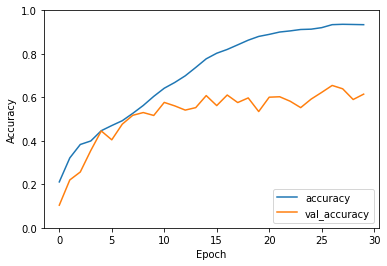

************************AlexNet*******************************
Test 4 : optimizer = SGD, epochs = 30, batch size = 128
Epoch 1/30
67/67 [==============================] - 11s 149ms/step - loss: 2.9146 - accuracy: 0.2073 - val_loss: 3.1828 - val_accuracy: 0.0860
Epoch 2/30
67/67 [==============================] - 10s 147ms/step - loss: 2.2909 - accuracy: 0.3306 - val_loss: 3.2931 - val_accuracy: 0.1353
Epoch 3/30
67/67 [==============================] - 10s 146ms/step - loss: 2.0041 - accuracy: 0.3973 - val_loss: 3.1287 - val_accuracy: 0.1387
Epoch 4/30
67/67 [==============================] - 10s 147ms/step - loss: 1.8217 - accuracy: 0.4421 - val_loss: 2.4874 - val_accuracy: 0.2447
Epoch 5/30
67/67 [==============================] - 10s 146ms/step - loss: 1.6835 - accuracy: 0.4781 - val_loss: 2.4372 - val_accuracy: 0.2840
Epoch 6/30
67/67 [==============================] - 10s 146ms/step - loss: 1.5577 - accuracy: 0.5067 - val_loss: 1.7477 - val_accuracy: 0.4460
Epoch 7/30
67/67 [=====

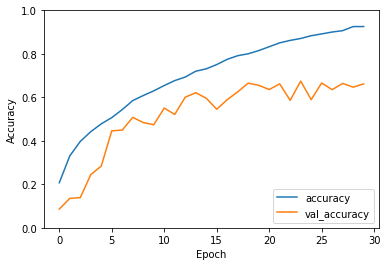

In [ ]:
print("************************AlexNet*******************************")
print ("Test 1 : optimizer = Adam, epochs = 30, batch size = 32" )
AlexNet_1, history_AN_1 = AlexNet_builder('adam',30,32)
plot(history_AN_1)
print("************************AlexNet*******************************")
print ("Test 2 : optimizer = SGD, epochs = 30, batch size = 32" )
AlexNet_2, history_AN_2 = AlexNet_builder('sgd', 30, 32)
plot(history_AN_2)
print("************************AlexNet*******************************")
print ("Test 3 : optimizer = Adam, epochs = 30, batch size = 128" )
AlexNet_3, history_AN_3 = AlexNet_builder('adam', 30, 128)
plot(history_AN_3)
print("************************AlexNet*******************************")
print ("Test 4 : optimizer = SGD, epochs = 30, batch size = 128" )
AlexNet_4, history_AN_4 = AlexNet_builder('sgd', 30, 128)
plot(history_AN_4)

In [ ]:
def vgg_block(num_convs, num_channels):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(
            tf.keras.layers.Conv2D(num_channels, kernel_size=3,
                                   padding='same', activation='relu'))
        blk.add(layers.BatchNormalization())
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk

In [ ]:
def VGG_builder(optimizer, epochs, batch_size):
  conv_arch =  ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
  model = tf.keras.models.Sequential()
    # The convulational part

  for (num_convs, num_channels) in conv_arch:
      model.add(vgg_block(num_convs, num_channels))
    # The fully-connected part
  model.add(
      tf.keras.models.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(4096, activation='relu'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(4096, activation='relu'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(20)]))
  # model.add(layers.Dense(len(our_classes),activation='softmax'))
  model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
  history= train(model, epochs, batch_size)
  return model, history

***********************VGG********************************
Test 1 : optimizer = Adam, epochs = 30, batch size = 32
Epoch 1/30
266/266 [==============================] - 9s 27ms/step - loss: 2.7450 - accuracy: 0.2098 - val_loss: 4.6397 - val_accuracy: 0.0667
Epoch 2/30
266/266 [==============================] - 6s 24ms/step - loss: 2.3698 - accuracy: 0.2776 - val_loss: 2.4185 - val_accuracy: 0.2373
Epoch 3/30
266/266 [==============================] - 6s 24ms/step - loss: 2.1939 - accuracy: 0.3368 - val_loss: 2.6451 - val_accuracy: 0.2213
Epoch 4/30
266/266 [==============================] - 6s 24ms/step - loss: 1.9996 - accuracy: 0.3946 - val_loss: 5.1694 - val_accuracy: 0.1593
Epoch 5/30
266/266 [==============================] - 6s 24ms/step - loss: 1.9148 - accuracy: 0.4174 - val_loss: 2.0337 - val_accuracy: 0.3920
Epoch 6/30
266/266 [==============================] - 6s 24ms/step - loss: 1.7563 - accuracy: 0.4729 - val_loss: 2.9691 - val_accuracy: 0.2653
Epoch 7/30
266/266 [=======

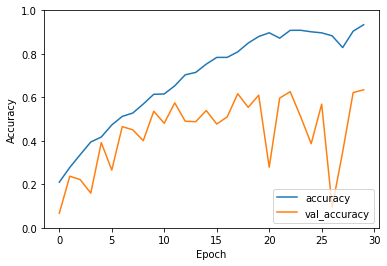

***********************VGG********************************
Test 2 : optimizer = SGD, epochs = 30, batch size = 32
Epoch 1/30
266/266 [==============================] - 7s 22ms/step - loss: 2.5907 - accuracy: 0.2248 - val_loss: 3.1652 - val_accuracy: 0.0973
Epoch 2/30
266/266 [==============================] - 6s 21ms/step - loss: 2.0413 - accuracy: 0.3641 - val_loss: 1.9948 - val_accuracy: 0.3740
Epoch 3/30
266/266 [==============================] - 6s 21ms/step - loss: 1.7854 - accuracy: 0.4413 - val_loss: 1.7156 - val_accuracy: 0.4653
Epoch 4/30
266/266 [==============================] - 6s 21ms/step - loss: 1.5513 - accuracy: 0.5102 - val_loss: 1.6932 - val_accuracy: 0.4800
Epoch 5/30
266/266 [==============================] - 6s 21ms/step - loss: 1.3382 - accuracy: 0.5691 - val_loss: 1.9169 - val_accuracy: 0.4540
Epoch 6/30
266/266 [==============================] - 6s 21ms/step - loss: 1.1744 - accuracy: 0.6280 - val_loss: 1.6923 - val_accuracy: 0.5007
Epoch 7/30
266/266 [========

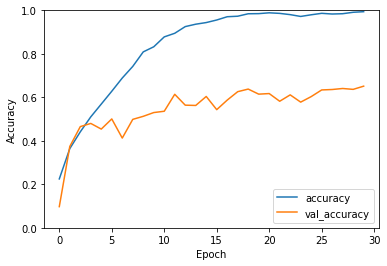

***********************VGG********************************
Test 3 : optimizer = Adam, epochs = 30, batch size = 128
Epoch 1/30
67/67 [==============================] - 8s 78ms/step - loss: 2.7587 - accuracy: 0.2355 - val_loss: 3.1724 - val_accuracy: 0.0547
Epoch 2/30
67/67 [==============================] - 3s 43ms/step - loss: 2.1159 - accuracy: 0.3580 - val_loss: 4.9739 - val_accuracy: 0.0553
Epoch 3/30
67/67 [==============================] - 3s 43ms/step - loss: 1.8669 - accuracy: 0.4316 - val_loss: 4.5300 - val_accuracy: 0.0553
Epoch 4/30
67/67 [==============================] - 3s 43ms/step - loss: 1.7271 - accuracy: 0.4751 - val_loss: 3.2523 - val_accuracy: 0.1767
Epoch 5/30
67/67 [==============================] - 3s 43ms/step - loss: 1.5175 - accuracy: 0.5453 - val_loss: 3.1489 - val_accuracy: 0.2033
Epoch 6/30
67/67 [==============================] - 3s 43ms/step - loss: 1.4888 - accuracy: 0.5802 - val_loss: 2.6248 - val_accuracy: 0.2780
Epoch 7/30
67/67 [====================

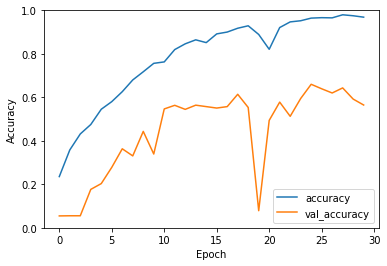

***********************VGG********************************
Test 4 : optimizer = SGD, epochs = 30, batch size = 128
Epoch 1/30
67/67 [==============================] - 4s 45ms/step - loss: 2.7523 - accuracy: 0.1889 - val_loss: 2.9981 - val_accuracy: 0.0627
Epoch 2/30
67/67 [==============================] - 3s 41ms/step - loss: 2.2238 - accuracy: 0.3166 - val_loss: 3.0582 - val_accuracy: 0.0400
Epoch 3/30
67/67 [==============================] - 3s 41ms/step - loss: 1.9264 - accuracy: 0.4007 - val_loss: 3.2206 - val_accuracy: 0.0707
Epoch 4/30
67/67 [==============================] - 3s 41ms/step - loss: 1.7241 - accuracy: 0.4626 - val_loss: 3.3278 - val_accuracy: 0.1180
Epoch 5/30
67/67 [==============================] - 3s 41ms/step - loss: 1.5155 - accuracy: 0.5231 - val_loss: 3.0147 - val_accuracy: 0.1740
Epoch 6/30
67/67 [==============================] - 3s 41ms/step - loss: 1.3271 - accuracy: 0.5864 - val_loss: 2.8344 - val_accuracy: 0.2040
Epoch 7/30
67/67 [=====================

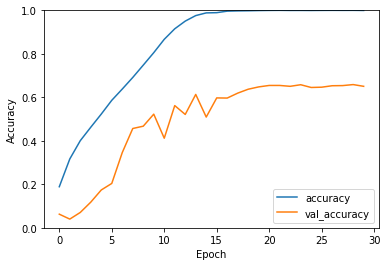

In [ ]:
print("***********************VGG********************************")
print ("Test 1 : optimizer = Adam, epochs = 30, batch size = 32" )
VGG_1, history_VGG_1 = VGG_builder('adam',30,32)
plot(history_VGG_1)
print("***********************VGG********************************")
print ("Test 2 : optimizer = SGD, epochs = 30, batch size = 32" )
VGG_2, history_VGG_2 = VGG_builder('sgd', 30, 32)
plot(history_VGG_2)
print("***********************VGG********************************")
print ("Test 3 : optimizer = Adam, epochs = 30, batch size = 128" )
VGG_3, history_VGG_3 = VGG_builder('adam', 30, 128)
plot(history_VGG_3)
print("***********************VGG********************************")
print ("Test 4 : optimizer = SGD, epochs = 30, batch size = 128" )
VGG_4, history_VGG_4 = VGG_builder('sgd', 30, 128)
plot(history_VGG_4)

In [ ]:
def MyCNN_builder(optimizer, epochs, batch_size):
   model = tf.keras.models.Sequential()
   model.add(layers.Conv2D(filters=300, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=300, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=200, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=200, kernel_size=5, activation='relu'))
   model.add(layers.AvgPool2D(pool_size=2, strides=2))
   model.add(layers.BatchNormalization())
   model.add(layers.Flatten())
   model.add(layers.Dense(2000, activation='relu'))  
   model.add(layers.Dense(1000, activation='relu'))
   model.add(layers.Dense(20))
   model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
   history= train(model, epochs, batch_size)

   return model, history

**************************MyCNN*****************************
Test 1 : optimizer = Adam, epochs = 30, batch size = 32
Epoch 1/30
266/266 [==============================] - 18s 59ms/step - loss: 3.0689 - accuracy: 0.1929 - val_loss: 3.5400 - val_accuracy: 0.0840
Epoch 2/30
266/266 [==============================] - 13s 49ms/step - loss: 2.3643 - accuracy: 0.2713 - val_loss: 2.6186 - val_accuracy: 0.2540
Epoch 3/30
266/266 [==============================] - 13s 49ms/step - loss: 2.2033 - accuracy: 0.3200 - val_loss: 2.3452 - val_accuracy: 0.2633
Epoch 4/30
266/266 [==============================] - 13s 49ms/step - loss: 2.1232 - accuracy: 0.3426 - val_loss: 2.0879 - val_accuracy: 0.3473
Epoch 5/30
266/266 [==============================] - 13s 49ms/step - loss: 2.0016 - accuracy: 0.3707 - val_loss: 2.2357 - val_accuracy: 0.3513
Epoch 6/30
266/266 [==============================] - 13s 49ms/step - loss: 1.8762 - accuracy: 0.4178 - val_loss: 1.9891 - val_accuracy: 0.4073
Epoch 7/30
266/266 

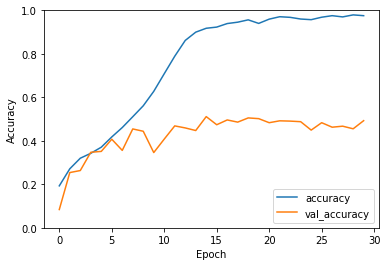

**************************MyCNN*****************************
Test 2 : optimizer = SGD, epochs = 30, batch size = 32
Epoch 1/30
266/266 [==============================] - 13s 46ms/step - loss: 2.3119 - accuracy: 0.3105 - val_loss: 3.9837 - val_accuracy: 0.0720
Epoch 2/30
266/266 [==============================] - 12s 45ms/step - loss: 1.6530 - accuracy: 0.4807 - val_loss: 2.2109 - val_accuracy: 0.3353
Epoch 3/30
266/266 [==============================] - 12s 45ms/step - loss: 1.1916 - accuracy: 0.6287 - val_loss: 1.9843 - val_accuracy: 0.4273
Epoch 4/30
266/266 [==============================] - 12s 46ms/step - loss: 0.8062 - accuracy: 0.7624 - val_loss: 1.7657 - val_accuracy: 0.4913
Epoch 5/30
266/266 [==============================] - 12s 46ms/step - loss: 0.4988 - accuracy: 0.8685 - val_loss: 1.6622 - val_accuracy: 0.5120
Epoch 6/30
266/266 [==============================] - 12s 46ms/step - loss: 0.2756 - accuracy: 0.9421 - val_loss: 2.1094 - val_accuracy: 0.4327
Epoch 7/30
266/266 [

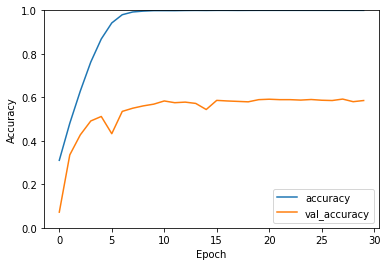

**************************MyCNN*****************************
Test 3 : optimizer = Adam, epochs = 30, batch size = 128
Epoch 1/30
67/67 [==============================] - 22s 264ms/step - loss: 3.2866 - accuracy: 0.2202 - val_loss: 3.3848 - val_accuracy: 0.0640
Epoch 2/30
67/67 [==============================] - 10s 142ms/step - loss: 2.2031 - accuracy: 0.3272 - val_loss: 3.8016 - val_accuracy: 0.0560
Epoch 3/30
67/67 [==============================] - 9s 142ms/step - loss: 1.9331 - accuracy: 0.4020 - val_loss: 4.5612 - val_accuracy: 0.0827
Epoch 4/30
67/67 [==============================] - 9s 141ms/step - loss: 1.7642 - accuracy: 0.4492 - val_loss: 3.5610 - val_accuracy: 0.0660
Epoch 5/30
67/67 [==============================] - 9s 141ms/step - loss: 1.5763 - accuracy: 0.5024 - val_loss: 3.1670 - val_accuracy: 0.1647
Epoch 6/30
67/67 [==============================] - 9s 141ms/step - loss: 1.3994 - accuracy: 0.5538 - val_loss: 2.9300 - val_accuracy: 0.2027
Epoch 7/30
67/67 [==========

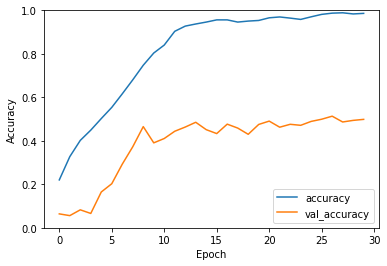

**************************MyCNN*****************************
Test 4 : optimizer = SGD, epochs = 30, batch size = 128
Epoch 1/30
67/67 [==============================] - 10s 141ms/step - loss: 2.2620 - accuracy: 0.3179 - val_loss: 3.1317 - val_accuracy: 0.0540
Epoch 2/30
67/67 [==============================] - 9s 139ms/step - loss: 1.6837 - accuracy: 0.4781 - val_loss: 3.5308 - val_accuracy: 0.0560
Epoch 3/30
67/67 [==============================] - 9s 139ms/step - loss: 1.3477 - accuracy: 0.5901 - val_loss: 4.1109 - val_accuracy: 0.0547
Epoch 4/30
67/67 [==============================] - 9s 139ms/step - loss: 1.0605 - accuracy: 0.6885 - val_loss: 3.7566 - val_accuracy: 0.0793
Epoch 5/30
67/67 [==============================] - 9s 139ms/step - loss: 0.8368 - accuracy: 0.7744 - val_loss: 3.6935 - val_accuracy: 0.0707
Epoch 6/30
67/67 [==============================] - 9s 142ms/step - loss: 0.6389 - accuracy: 0.8456 - val_loss: 3.2647 - val_accuracy: 0.1553
Epoch 7/30
67/67 [============

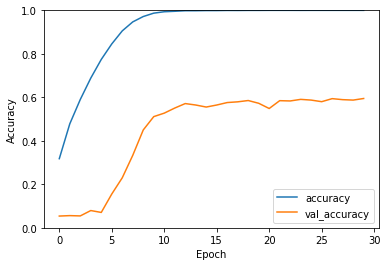

In [ ]:
print("**************************MyCNN*****************************")
print ("Test 1 : optimizer = Adam, epochs = 30, batch size = 32" )
MyCNN_1, history_MyCNN_1 = MyCNN_builder('adam',30,32)
plot(history_MyCNN_1)
print("**************************MyCNN*****************************")
print ("Test 2 : optimizer = SGD, epochs = 30, batch size = 32" )
MyCNN_2, history_MyCNN_2 = MyCNN_builder('sgd', 30, 32)
plot(history_MyCNN_2)
print("**************************MyCNN*****************************")
print ("Test 3 : optimizer = Adam, epochs = 30, batch size = 128" )
MyCNN_3, history_MyCNN_3 = MyCNN_builder('adam', 30, 128)
plot(history_MyCNN_3)
print("**************************MyCNN*****************************")
print ("Test 4 : optimizer = SGD, epochs = 30, batch size = 128" )
MyCNN_4, history_MyCNN_4 = MyCNN_builder('sgd', 30, 128)
plot(history_MyCNN_4)

# Σχολιασμός 

***
## Πλήθος Δεδομένων
Είναι αναμενόμενο ότι το μεγαλύτερο πλήθος δεδομένων οδηγεί σε μεγαλύτερη ακρίβεια, καθώς το μοντέλο λαμβάνει περισσότερες πληροφορίες για κάθε κλάση.

## Αλγόριθμος Βελτιστοποίησης (Optimizer)
Χρησιμοποιήσαμε τους αλγόριθμους βελτιστοποίησης Adam και SGD. 
- **Lenet:** Παρατηρούμε ότι με την χρήση του Adam έχουμε μεγαλύτερη ακρίβεια από ότι με τον SGD. Ο SGD σταματάει να βελτιώνει τα αποτελέσματα πολύ νωρίς.
- **AlexNet:** Δεν παρατηρείται μεγάλη διαφορά μεταξύ των αλγορίθμων. Και οι δύο είναι εξίσου αποδοτικοί.

- **VGG:** Ενώ φτάνουν και οι δύο σε παρόμοια ακρίβεια, παρατηρούμε ότι ο SGD φτάνει πιο γρήγορα και πιο σταθερά. Επίσης έχει ελάχιστα καλύτερη ακρίβεια

- **MyCNN:** Ούτε εδώ φαίνεται μεγάλη διαφορά ανάμεσα στους αλγορίθμους. Ο SGD οδηγεί και πάλι σε ελάχιστα καλύτερη ακρίβεια, πιο γρήγορα και πιο σταθερά.

## Μέγεθος Δέσμης (Batch Size)
Για να μελετήσουμε την επιρροή του batch size στην ακρίβεια χρησιμοποιήσαμε ενδεικτικά μία μικρη (32) και μία μεγάλη (128) τιμή.

Παρατηρούμε ότι το μικρό μέγεθος δέσμής παρουσιάζει για όλα τα μοντέλα καλύτερη ακρίβεια, όπως είναι αναμενόμενο.

In [ ]:
test_loss ={}
test_acc ={}
test_loss["LeNet"], test_acc["LeNet"] = LeNet_1.evaluate(x_test,  y_test, verbose=2)
test_loss["AlexNet"], test_acc["AlexNet"] = AlexNet_2.evaluate(x_test,  y_test, verbose=2)
test_loss["VGG"], test_acc["VGG"] = VGG_2.evaluate(x_test,  y_test, verbose=2)
test_loss["MyCNN"], test_acc["MyCNN"] = MyCNN_2.evaluate(x_test,  y_test, verbose=2)

test_loss = dict(sorted(test_loss.items(),key=lambda x:x[1],reverse = False))
test_acc = dict(sorted(test_acc.items(),key=lambda x:x[1],reverse = True))

print("**************")
print("Losses : ")
[print(key,':',value) for key, value in test_loss.items()]
# print(test_loss)
print("**************")
print("\nAccuracies : ")
[print(key,':',value) for key, value in test_acc.items()]
print("**************")

# print(test_acc)

63/63 - 0s - loss: 1.9078 - accuracy: 0.4890 - 164ms/epoch - 3ms/step
63/63 - 1s - loss: 1.2802 - accuracy: 0.6945 - 851ms/epoch - 14ms/step
63/63 - 0s - loss: 2.0308 - accuracy: 0.6465 - 386ms/epoch - 6ms/step
63/63 - 1s - loss: 1.8107 - accuracy: 0.5835 - 782ms/epoch - 12ms/step
**************
Losses : 
AlexNet : 1.280191421508789
MyCNN : 1.8106521368026733
LeNet : 1.9077918529510498
VGG : 2.030810832977295
**************

Accuracies : 
AlexNet : 0.6945000290870667
VGG : 0.6464999914169312
MyCNN : 0.5835000276565552
LeNet : 0.48899999260902405
**************


Για κάθε μοντέλο κρατήσαμε τον καλύτερο συνδιασμό παραμέτρων. 

Συγκεκρίμενα : 
- **LeNet:** optimizer : adam , batch size : 32  
- **AlexNet:** optimizer : sdg , batch size : 32
- **VGG:** optimizer : sdg , batch size : 32
- **MyCNN:** optimizer : sdg , batch size : 32

Παρατηρούμε ότι από τα 4 μοντέλα την καλύτερη απόδοση έχει το AlexNet.


## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 
- Πρόωρος τερματισμός (early stopping [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)) 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=10,
        verbose=1,
    )
]

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=x_train.shape[1:]),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

def MyCNN_Overfit_Builder(optimizer, epochs,  batch_size, dropout = False, augmentation = False, callbacks = None):
   model = tf.keras.models.Sequential()
   if(augmentation): model.add(data_augmentation)
   model.add(layers.Conv2D(filters=300, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=300, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=200, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=200, kernel_size=5, activation='relu'))
   model.add(layers.AvgPool2D(pool_size=2, strides=2))
   model.add(layers.BatchNormalization())
   model.add(layers.Flatten())
   model.add(layers.Dense(2000, activation='relu'))  
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(1000, activation='relu'))
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(20))
   model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
   history= train(model, epochs, batch_size, callbacks)

   return model, history

**************************OverFitting*****************************
Test 1 : Early Stopping
Epoch 1/30
266/266 [==============================] - 13s 46ms/step - loss: 2.3097 - accuracy: 0.3081 - val_loss: 3.9824 - val_accuracy: 0.0727
Epoch 2/30
266/266 [==============================] - 12s 46ms/step - loss: 1.6372 - accuracy: 0.4939 - val_loss: 2.0970 - val_accuracy: 0.3560
Epoch 3/30
266/266 [==============================] - 12s 46ms/step - loss: 1.2062 - accuracy: 0.6227 - val_loss: 1.9475 - val_accuracy: 0.4493
Epoch 4/30
266/266 [==============================] - 12s 46ms/step - loss: 0.8194 - accuracy: 0.7544 - val_loss: 2.1082 - val_accuracy: 0.4247
Epoch 5/30
266/266 [==============================] - 12s 46ms/step - loss: 0.5167 - accuracy: 0.8579 - val_loss: 1.9236 - val_accuracy: 0.4487
Epoch 6/30
266/266 [==============================] - 12s 46ms/step - loss: 0.2961 - accuracy: 0.9368 - val_loss: 1.7220 - val_accuracy: 0.5347
Epoch 7/30
266/266 [=========================

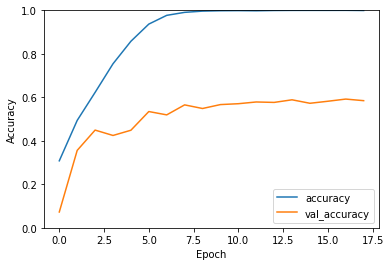

**************************OverFitting*****************************
Test 2 : Dropout
Epoch 1/30
266/266 [==============================] - 13s 47ms/step - loss: 2.4010 - accuracy: 0.2938 - val_loss: 3.2625 - val_accuracy: 0.1027
Epoch 2/30
266/266 [==============================] - 12s 46ms/step - loss: 1.7767 - accuracy: 0.4453 - val_loss: 2.3212 - val_accuracy: 0.3373
Epoch 3/30
266/266 [==============================] - 12s 46ms/step - loss: 1.3908 - accuracy: 0.5606 - val_loss: 1.8930 - val_accuracy: 0.4240
Epoch 4/30
266/266 [==============================] - 12s 46ms/step - loss: 1.0686 - accuracy: 0.6613 - val_loss: 1.9479 - val_accuracy: 0.4300
Epoch 5/30
266/266 [==============================] - 12s 46ms/step - loss: 0.7922 - accuracy: 0.7552 - val_loss: 1.7954 - val_accuracy: 0.4773
Epoch 6/30
266/266 [==============================] - 12s 46ms/step - loss: 0.5546 - accuracy: 0.8347 - val_loss: 1.6108 - val_accuracy: 0.5367
Epoch 7/30
266/266 [==============================] 

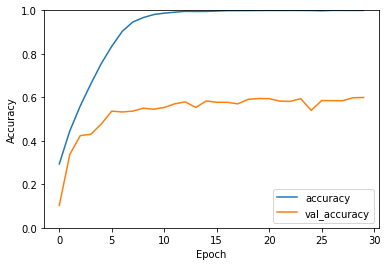

**************************OverFitting*****************************
Test 3 : Data Augmentation
Epoch 1/30
266/266 [==============================] - 14s 48ms/step - loss: 2.4149 - accuracy: 0.2851 - val_loss: 3.5955 - val_accuracy: 0.0920
Epoch 2/30
266/266 [==============================] - 13s 47ms/step - loss: 1.9551 - accuracy: 0.3899 - val_loss: 2.1620 - val_accuracy: 0.3260
Epoch 3/30
266/266 [==============================] - 13s 47ms/step - loss: 1.7337 - accuracy: 0.4584 - val_loss: 1.9152 - val_accuracy: 0.4273
Epoch 4/30
266/266 [==============================] - 13s 47ms/step - loss: 1.5949 - accuracy: 0.4972 - val_loss: 1.9270 - val_accuracy: 0.4193
Epoch 5/30
266/266 [==============================] - 13s 47ms/step - loss: 1.4684 - accuracy: 0.5458 - val_loss: 1.8470 - val_accuracy: 0.4473
Epoch 6/30
266/266 [==============================] - 12s 47ms/step - loss: 1.3561 - accuracy: 0.5681 - val_loss: 1.6139 - val_accuracy: 0.5033
Epoch 7/30
266/266 [======================

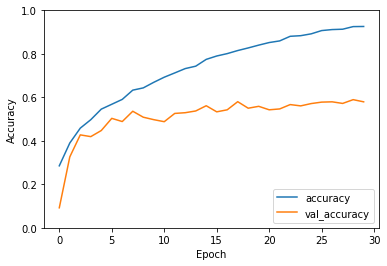

In [ ]:
print("**************************OverFitting*****************************")
print ("Test 1 : Early Stopping")
MyCNN_O1, history_MyCNN_O1 = MyCNN_Overfit_Builder("sgd",30,32, callbacks = callbacks)
plot(history_MyCNN_O1)
print("**************************OverFitting*****************************")
print ("Test 2 : Dropout" )
MyCNN_O2, history_MyCNN_O2 = MyCNN_Overfit_Builder("sgd",30,32, dropout = True)
plot(history_MyCNN_O2)
print("**************************OverFitting*****************************")
print ("Test 3 : Data Augmentation" )
MyCNN_O3, history_MyCNN_O3 = MyCNN_Overfit_Builder("sgd",30,32, augmentation = True)
plot(history_MyCNN_O3)



**************************OverFitting*****************************
Test 4 : Early Stopping & Dropout
Epoch 1/30
266/266 [==============================] - 13s 47ms/step - loss: 2.3844 - accuracy: 0.2995 - val_loss: 3.5404 - val_accuracy: 0.0720
Epoch 2/30
266/266 [==============================] - 12s 46ms/step - loss: 1.7784 - accuracy: 0.4448 - val_loss: 2.2108 - val_accuracy: 0.3187
Epoch 3/30
266/266 [==============================] - 12s 46ms/step - loss: 1.4179 - accuracy: 0.5501 - val_loss: 2.1613 - val_accuracy: 0.3727
Epoch 4/30
266/266 [==============================] - 12s 46ms/step - loss: 1.0945 - accuracy: 0.6552 - val_loss: 1.6987 - val_accuracy: 0.4933
Epoch 5/30
266/266 [==============================] - 12s 46ms/step - loss: 0.8086 - accuracy: 0.7524 - val_loss: 1.9866 - val_accuracy: 0.4213
Epoch 6/30
266/266 [==============================] - 12s 46ms/step - loss: 0.5992 - accuracy: 0.8199 - val_loss: 1.7027 - val_accuracy: 0.5073
Epoch 7/30
266/266 [===============

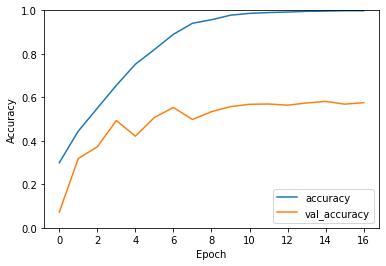

**************************OverFitting*****************************
Test 5 : Dropout & Data Augmentation
Epoch 1/30
266/266 [==============================] - 14s 48ms/step - loss: 2.5090 - accuracy: 0.2555 - val_loss: 3.4867 - val_accuracy: 0.0707
Epoch 2/30
266/266 [==============================] - 13s 47ms/step - loss: 2.0494 - accuracy: 0.3631 - val_loss: 2.1968 - val_accuracy: 0.3033
Epoch 3/30
266/266 [==============================] - 13s 47ms/step - loss: 1.8347 - accuracy: 0.4299 - val_loss: 1.9005 - val_accuracy: 0.4287
Epoch 4/30
266/266 [==============================] - 13s 47ms/step - loss: 1.6965 - accuracy: 0.4682 - val_loss: 2.1143 - val_accuracy: 0.3500
Epoch 5/30
266/266 [==============================] - 13s 47ms/step - loss: 1.5705 - accuracy: 0.5089 - val_loss: 2.0992 - val_accuracy: 0.3827
Epoch 6/30
266/266 [==============================] - 13s 47ms/step - loss: 1.5003 - accuracy: 0.5209 - val_loss: 1.6684 - val_accuracy: 0.4800
Epoch 7/30
266/266 [============

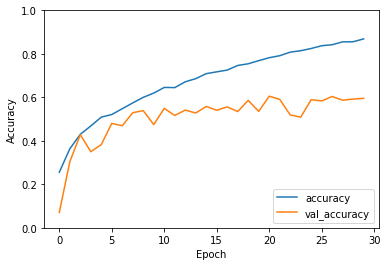

**************************OverFitting*****************************
Test 6 : Early Stopping &  Data Augmentation
Epoch 1/30
266/266 [==============================] - 14s 48ms/step - loss: 2.3728 - accuracy: 0.2876 - val_loss: 3.8803 - val_accuracy: 0.0693
Epoch 2/30
266/266 [==============================] - 13s 47ms/step - loss: 1.9337 - accuracy: 0.3951 - val_loss: 2.3762 - val_accuracy: 0.2847
Epoch 3/30
266/266 [==============================] - 13s 47ms/step - loss: 1.7375 - accuracy: 0.4602 - val_loss: 1.9940 - val_accuracy: 0.4193
Epoch 4/30
266/266 [==============================] - 12s 47ms/step - loss: 1.5945 - accuracy: 0.5008 - val_loss: 1.8895 - val_accuracy: 0.4153
Epoch 5/30
266/266 [==============================] - 12s 47ms/step - loss: 1.4562 - accuracy: 0.5432 - val_loss: 1.9400 - val_accuracy: 0.4267
Epoch 6/30
266/266 [==============================] - 12s 47ms/step - loss: 1.3676 - accuracy: 0.5647 - val_loss: 1.8321 - val_accuracy: 0.4633
Epoch 7/30
266/266 [====

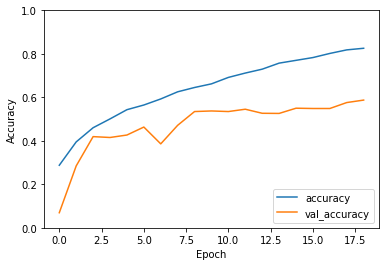

In [ ]:
print("**************************OverFitting*****************************")
print ("Test 4 : Early Stopping & Dropout")
MyCNN_O4, history_MyCNN_O4 = MyCNN_Overfit_Builder("sgd",30,32, dropout = True, callbacks = callbacks)
plot(history_MyCNN_O4)
print("**************************OverFitting*****************************")
print ("Test 5 : Dropout & Data Augmentation" )
MyCNN_O5, history_MyCNN_O5 = MyCNN_Overfit_Builder("sgd",30,32, dropout = True, augmentation = True)
plot(history_MyCNN_O5)
print("**************************OverFitting*****************************")
print ("Test 6 : Early Stopping &  Data Augmentation" )
MyCNN_O6, history_MyCNN_O6 = MyCNN_Overfit_Builder("sgd",30,32, augmentation = True, callbacks = callbacks)
plot(history_MyCNN_O6)


**************************OverFitting*****************************
Test 7 : Early Stopping & Dropout &  Data Augmentation
Epoch 1/30
266/266 [==============================] - 14s 47ms/step - loss: 2.4801 - accuracy: 0.2784 - val_loss: 3.9538 - val_accuracy: 0.0600
Epoch 2/30
266/266 [==============================] - 12s 47ms/step - loss: 2.0400 - accuracy: 0.3778 - val_loss: 2.2349 - val_accuracy: 0.3067
Epoch 3/30
266/266 [==============================] - 12s 47ms/step - loss: 1.8422 - accuracy: 0.4258 - val_loss: 1.8527 - val_accuracy: 0.4100
Epoch 4/30
266/266 [==============================] - 12s 47ms/step - loss: 1.7140 - accuracy: 0.4592 - val_loss: 1.6760 - val_accuracy: 0.4847
Epoch 5/30
266/266 [==============================] - 12s 47ms/step - loss: 1.5956 - accuracy: 0.4942 - val_loss: 2.2606 - val_accuracy: 0.3473
Epoch 6/30
266/266 [==============================] - 12s 47ms/step - loss: 1.5101 - accuracy: 0.5264 - val_loss: 1.7431 - val_accuracy: 0.4907
Epoch 7/30
266

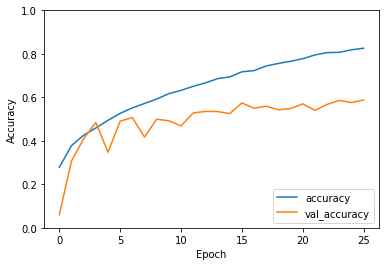

In [ ]:
print("**************************OverFitting*****************************")
print ("Test 7 : Early Stopping & Dropout &  Data Augmentation" )
MyCNN_O7, history_MyCNN_O7 = MyCNN_Overfit_Builder("sgd",30,32, augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNN_O7)

In [ ]:
test_loss ={}
test_acc ={}
test_loss["No OverFitting Check"], test_acc["No OverFitting Check"] = MyCNN_2.evaluate(x_test,  y_test, verbose=2)
test_loss["Early Stopping"], test_acc["Early Stopping"] = MyCNN_O1.evaluate(x_test,  y_test, verbose=2)
test_loss["Dropout"], test_acc["Dropout"] = MyCNN_O2.evaluate(x_test,  y_test, verbose=2)
test_loss["Data Augmentation"], test_acc["Data Augmentation"] = MyCNN_O3.evaluate(x_test,  y_test, verbose=2)
test_loss["Early Stopping & Dropout"], test_acc["Early Stopping & Dropout"] = MyCNN_O4.evaluate(x_test,  y_test, verbose=2)
test_loss["Dropout & Data Augmentation"], test_acc["Dropout & Data Augmentation"] = MyCNN_O5.evaluate(x_test,  y_test, verbose=2)
test_loss["Early Stopping & Data Augmentation"], test_acc["Early Stopping & Data Augmentation"] = MyCNN_O6.evaluate(x_test,  y_test, verbose=2)
test_loss["All Techniques"], test_acc["All Techniques"] = MyCNN_O7.evaluate(x_test,  y_test, verbose=2)

test_loss = dict(sorted(test_loss.items(),key=lambda x:x[1],reverse = False))
test_acc = dict(sorted(test_acc.items(),key=lambda x:x[1],reverse = True))

print("**************")
print("Losses : ")
[print(key,':',value) for key, value in test_loss.items()]
# print(test_loss)
print("**************")
print("\nAccuracies : ")
[print(key,':',value) for key, value in test_acc.items()]
print("**************")

# print(test_acc)

63/63 - 1s - loss: 1.8107 - accuracy: 0.5835 - 941ms/epoch - 15ms/step
63/63 - 1s - loss: 1.7481 - accuracy: 0.5715 - 778ms/epoch - 12ms/step
63/63 - 1s - loss: 1.8007 - accuracy: 0.5925 - 777ms/epoch - 12ms/step
63/63 - 1s - loss: 1.6580 - accuracy: 0.5945 - 777ms/epoch - 12ms/step
63/63 - 1s - loss: 1.7845 - accuracy: 0.5730 - 780ms/epoch - 12ms/step
63/63 - 1s - loss: 1.5223 - accuracy: 0.6015 - 773ms/epoch - 12ms/step
63/63 - 1s - loss: 1.5361 - accuracy: 0.5740 - 783ms/epoch - 12ms/step
63/63 - 1s - loss: 1.5139 - accuracy: 0.5835 - 778ms/epoch - 12ms/step
**************
Losses : 
All Techniques : 1.5139201879501343
Dropout & Data Augmentation : 1.522255778312683
Early Stopping & Data Augmentation : 1.5361015796661377
Data Augmentation : 1.6579899787902832
Early Stopping : 1.7481417655944824
Early Stopping & Dropout : 1.7844704389572144
Dropout : 1.8006598949432373
No OverFitting Check : 1.8106521368026733
**************

Accuracies : 
Dropout & Data Augmentation : 0.6014999747276

# Σχολιασμός
***
Παρατηρούμε ότι όλες οι μέθοδοι και οι συνδιασμοί μειώνουν το  loss ενώ αρκετες παρουσιάζουν και μεγαλύτερη ακρίβεια.

Καταλήγουμε στο ότι η χρήση τεχνικών αντιμετώπισης του Overfitting είναι πολύχρήσιμες για την βελτίωση του μοντέλου μας.

Με βάση τα παραπάνω θα χρησιμοποιήσουμε στη συνέχεια της άσκησης και τις 3 τεχνικές.

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

In [ ]:
def MyCNN16_Builder(Vgg16, optimizer,epochs, batch_size, augmentation = False, dropout = False, callbacks = None):
   model =  models.Sequential()
   if(augmentation): model.add(data_augmentation)
   model.add(Vgg16)
   model.add(layers.Flatten())
   model.add(layers.Dense(2000, activation='relu'))  
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(1000, activation='relu'))
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(20))
   model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
   history= train(model, epochs, batch_size, callbacks)
   return model,history


In [ ]:
# Vgg16.trainable = True
def activate(percentage):
  Vgg16 = tf.keras.applications.vgg16.VGG16(
      include_top=False,
      input_shape=x_train.shape[1:],
      pooling=None,
      classifier_activation='softmax'
    )
  Vgg16.trainable = True
  numoflayers = len(Vgg16.layers)
  numoftrainable = round(numoflayers*percentage)
  for layer in Vgg16.layers[:numoflayers-numoftrainable]:
    layer.trainable = False
  return Vgg16

Epoch 1/30
266/266 [==============================] - 5s 14ms/step - loss: 2.6091 - accuracy: 0.2382 - val_loss: 2.2622 - val_accuracy: 0.3487
Epoch 2/30
266/266 [==============================] - 3s 13ms/step - loss: 2.1257 - accuracy: 0.3605 - val_loss: 1.9693 - val_accuracy: 0.3987
Epoch 3/30
266/266 [==============================] - 3s 13ms/step - loss: 1.9556 - accuracy: 0.3942 - val_loss: 1.8556 - val_accuracy: 0.4320
Epoch 4/30
266/266 [==============================] - 3s 13ms/step - loss: 1.8494 - accuracy: 0.4191 - val_loss: 1.7859 - val_accuracy: 0.4313
Epoch 5/30
266/266 [==============================] - 3s 13ms/step - loss: 1.7809 - accuracy: 0.4349 - val_loss: 1.7346 - val_accuracy: 0.4493
Epoch 6/30
266/266 [==============================] - 4s 14ms/step - loss: 1.7380 - accuracy: 0.4476 - val_loss: 1.6867 - val_accuracy: 0.4687
Epoch 7/30
266/266 [==============================] - 3s 13ms/step - loss: 1.7017 - accuracy: 0.4625 - val_loss: 1.6700 - val_accuracy: 0.4773

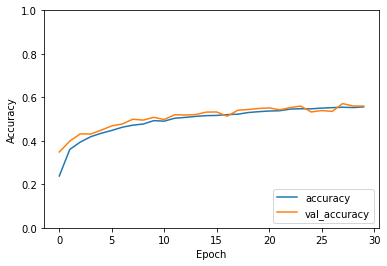

In [ ]:
Vgg16_0 = activate(0)
MyCNN16_0,history_MyCNN16_0 =  MyCNN16_Builder(Vgg16_0,"sgd",30, 32, augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNN16_0)

Epoch 1/30
266/266 [==============================] - 6s 20ms/step - loss: 2.1096 - accuracy: 0.3419 - val_loss: 1.7774 - val_accuracy: 0.4273
Epoch 2/30
266/266 [==============================] - 5s 19ms/step - loss: 1.6017 - accuracy: 0.4900 - val_loss: 1.5063 - val_accuracy: 0.5193
Epoch 3/30
266/266 [==============================] - 5s 19ms/step - loss: 1.4251 - accuracy: 0.5462 - val_loss: 1.3200 - val_accuracy: 0.5940
Epoch 4/30
266/266 [==============================] - 5s 19ms/step - loss: 1.2962 - accuracy: 0.5835 - val_loss: 1.4738 - val_accuracy: 0.5453
Epoch 5/30
266/266 [==============================] - 5s 19ms/step - loss: 1.2178 - accuracy: 0.6061 - val_loss: 1.2475 - val_accuracy: 0.6180
Epoch 6/30
266/266 [==============================] - 5s 20ms/step - loss: 1.1701 - accuracy: 0.6201 - val_loss: 1.2741 - val_accuracy: 0.6013
Epoch 7/30
266/266 [==============================] - 5s 19ms/step - loss: 1.0970 - accuracy: 0.6453 - val_loss: 1.1810 - val_accuracy: 0.6307

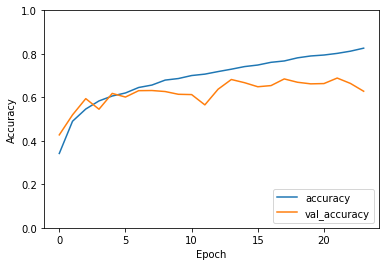

In [ ]:
Vgg16_20 = activate(0.2)
MyCNN16_20,history_MyCNN16_20 =  MyCNN16_Builder(Vgg16_20,"sgd",30, 32,augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNN16_20)

Epoch 1/30
266/266 [==============================] - 8s 27ms/step - loss: 2.1591 - accuracy: 0.3276 - val_loss: 1.8021 - val_accuracy: 0.4520
Epoch 2/30
266/266 [==============================] - 7s 26ms/step - loss: 1.5240 - accuracy: 0.5186 - val_loss: 1.2977 - val_accuracy: 0.5800
Epoch 3/30
266/266 [==============================] - 7s 26ms/step - loss: 1.2985 - accuracy: 0.5844 - val_loss: 1.0982 - val_accuracy: 0.6427
Epoch 4/30
266/266 [==============================] - 7s 26ms/step - loss: 1.1285 - accuracy: 0.6401 - val_loss: 1.0615 - val_accuracy: 0.6687
Epoch 5/30
266/266 [==============================] - 7s 26ms/step - loss: 1.0321 - accuracy: 0.6702 - val_loss: 1.0400 - val_accuracy: 0.6767
Epoch 6/30
266/266 [==============================] - 7s 26ms/step - loss: 0.9102 - accuracy: 0.7051 - val_loss: 1.0351 - val_accuracy: 0.6760
Epoch 7/30
266/266 [==============================] - 7s 26ms/step - loss: 0.8638 - accuracy: 0.7204 - val_loss: 1.0779 - val_accuracy: 0.6713

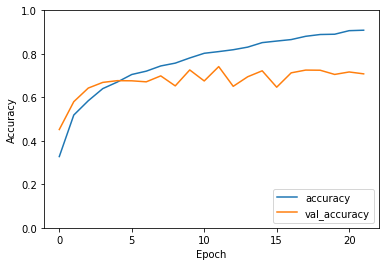

In [ ]:
Vgg16_50 = activate(0.5)
MyCNN16_50,history_MyCNN16_50 =  MyCNN16_Builder(Vgg16_50,"sgd",30, 32,augmentation = True, dropout = True,callbacks = callbacks)
plot(history_MyCNN16_50)

In [ ]:
val_acc ={}
test_acc ={}
_, test_acc["0%"] = MyCNN16_0.evaluate(x_test,  y_test, verbose=2)
_, test_acc["20%"] = MyCNN16_20.evaluate(x_test,  y_test, verbose=2)
_, test_acc["50%"] = MyCNN16_50.evaluate(x_test,  y_test, verbose=2)
val_acc["0%"] = history_MyCNN16_0.history['val_accuracy'][-1]
val_acc["20%"] = history_MyCNN16_20.history['val_accuracy'][-1]
val_acc["50%"] = history_MyCNN16_50.history['val_accuracy'][-1]


val_acc = dict(sorted(val_acc.items(),key=lambda x:x[1],reverse = True))
test_acc = dict(sorted(test_acc.items(),key=lambda x:x[1],reverse = True))

print("**************")
print("Val Accuracy : ")
[print(key,':',value) for key, value in val_acc.items()]
# print(test_loss)
print("**************")
print("\nTest Accuracy : ")
[print(key,':',value) for key, value in test_acc.items()]
print("**************")

# print(test_acc)

63/63 - 1s - loss: 1.4278 - accuracy: 0.5515 - 614ms/epoch - 10ms/step
63/63 - 1s - loss: 1.3561 - accuracy: 0.6475 - 556ms/epoch - 9ms/step
63/63 - 1s - loss: 1.1601 - accuracy: 0.7105 - 554ms/epoch - 9ms/step
**************
Val Accuracy : 
50% : 0.7080000042915344
20% : 0.628000020980835
0% : 0.5600000023841858
**************

Test Accuracy : 
50% : 0.7105000019073486
20% : 0.6474999785423279
0% : 0.5515000224113464
**************


# Σχολιασμός
***
Όπως είναι αναμενόμενο, η χρήση Transfer learning επιτυγχάνει σημαντικά μεγαλύτερη ακρίβεια. 

Επίσης η επανεκπαίδευση μεγαλύτερου πσοστού του επιπέδων της συνελικτικής βάσης οδηγεί σε μεγαλύτερη ακρίβεια των αποτελεσμάτων.

Προφανώς η επανεκπαίδευση όλων των επιπέδων οδηγεί σε ακόμα καλύτερη ακρίβεια, ατξάνοντας όμως παράλληλα και τον χρόνο εκπαίδευσης, το οποίο αναιρεί από ένα σημείο και μετά το πλεονέκτημα του transfer learning.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
